In [13]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('Fashion MNIST/fashion-mnist_train.csv')

In [3]:
test = pd.read_csv('Fashion MNIST/fashion-mnist_test.csv')

In [17]:
sample_train = train.loc[np.random.choice(range(len(train)), 10000, False)]
sample_train = sample_train.reset_index(drop=True)

In [21]:
y_train_label = sample_train['label']
X_train = sample_train.drop('label', axis=1) / 255

In [22]:
y_test_label = test['label']
X_test = test.drop('label', axis=1) / 255

In [33]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [42]:
scores = []
points = list(range(1, 785, 5))
for i in points:
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    clf = GaussianNB()
    clf.fit(X_train_pca, y_train_label)
    scores.append(clf.score(X_test_pca, y_test_label))

In [43]:
import matplotlib.pyplot as plt

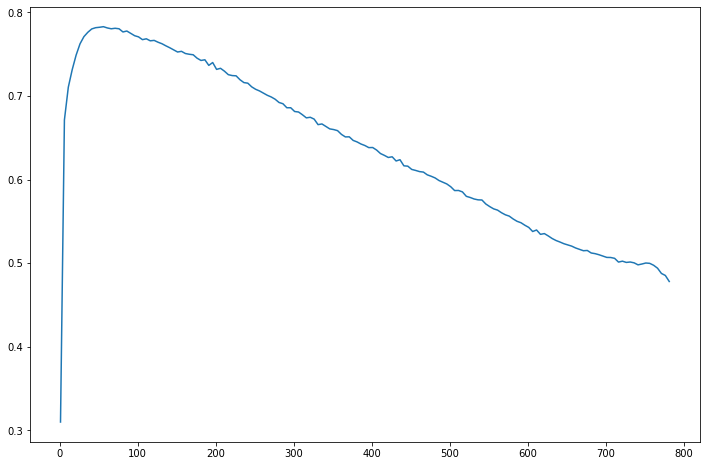

In [44]:
plt.figure(figsize=(12,8))
plt.plot(points, scores)